In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import os
import xlsxwriter
import gdown


# QUESTION NO -1

In [2]:
file_data= pd.DataFrame({
    "Student Name": ["John Doe", "Jane Doe", "Peter Smith", "Mary Johnson"],
    "Class": ["10th", "11th", "12th", "12th"],
    "Sec": ["A", "B", "A", "B"],
    "Percentage": [80, 90, 75, 85],
    "Age": [15, 16, 17, 18],
    "Grade": ["A", "A", "B", "A"]
})

- Creating Excel file

In [3]:
file_data.to_excel("Student.xlsx",sheet_name="Sheet1",index=False)

- Creating csv file

In [4]:
file_data.to_csv("student.csv",index=False)

- Creating text file

In [5]:
file_data.to_csv("student.txt",index=False)

In [6]:
student_1 = "https://drive.google.com/file/d/1ie80blBivDC_mCTYJrUMxsjFNpRNSLUV/view?usp=drive_link"
student_2="https://drive.google.com/file/d/1H8BnqO7Z-CziLLZ7YV0JbeHtG1Lsg67n/view?usp=drive_link"
student_3 = "https://drive.google.com/file/d/1lzCiv7oFhbQlStdP8HEWGkAsh4SomaVS/view?usp=drive_link"

In [7]:
# excel_data=pd.read_excel(student_1)
# csv_data=pd.read_csv(student_2)
# text_data = pd.read_csv(student_3,sep="\t")

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# question no - 2

In [8]:
import requests as req
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
import statistics as stat

url = "https://www.flipkart.com/search?p%5B%5D=facets.brand%255B%255D%3DSamsung&sid=tyy%2F4io&sort=recency_desc&wid=1.productCard.PMU_V2_1"

# Send a GET request to the URL
response = req.get(url)

soup = bs(response.text,'html.parser')


In [9]:
# Find all the product containers
product_containers = soup.find_all('div', class_='_1AtVbE')

# Create a list to store product details
mobile_names = []
price_list = []
specifications_list = []
actual_price_list = []
discount_list = []
delivery_list = []
rating_list = []


# Iterate through product containers and extract information
for container in product_containers:
    # Extract product title
    title_elem = container.find('div', class_='_4rR01T')
    title = title_elem.get_text(strip=True) if title_elem else "N/A"
    mobile_names.append(title)


    # Extract product price
    price_elem = container.find('div', class_='_30jeq3')
    price = price_elem.get_text(strip=True) if price_elem else "N/A"
    price_list.append(price)


    # Extract actual price
    actual_price_elem = container.find('div', class_='_3I9_wc _27UcVY')
    
    if actual_price_elem is not None:
        actual_price_text = actual_price_elem.get_text(strip=True)
        actual_price_list.append(actual_price_text)
    else:
        actual_price_list.append("N/A")
    

    # Extract discounted price
    discount_content = container.find('div', class_='_3Ay6Sb')
    
    if discount_content is not None:
        discount_text = discount_content.get_text(strip=True)
        discount_list.append(discount_text)
    else:
        discount_list.append("N/A")
    

    # Extract delivery service
    delivery_content = container.find('div', class_='_2Tpdn3')
    
    if delivery_content is not None:
       delivery_text = delivery_content.get_text(strip=True)
       delivery_list.append(delivery_text)
    else:
       delivery_list.append("N/A")


    # Extract rating 
    rating_content = container.find('div', class_='gUuXy-')
    
    if rating_content is not None:
       rating_text = rating_content.get_text(strip=True)
       rating_list.append(rating_text)
    else:
       rating_list.append("N/A")

    
    # Extract product specifications
    specs = container.find('ul', class_='_1xgFaf')
    specification_elems = specs.find_all('li', class_='rgWa7D') if specs else []
    
    specifications = [spec.get_text(strip=True) for spec in specification_elems]

    specifications_list.append(specifications)


    


mobile_names = mobile_names[3:]
price_list = price_list[3:]
actual_price_list = actual_price_list[3:]
specifications_list = specifications_list[3:]
discount_list = discount_list[3:]
delivery_list = delivery_list[3:]
rating_list = rating_list [3:]


In [10]:

ram =[]
rom = []
display = []
camera = []
battery = []
warranty = []

for specs in specifications_list:
    if len(specs) >= 5:
        # Extract and store RAM and ROM
        ram_rom = specs[0].split('|')
        ram.append(ram_rom[0].strip())
        rom.append(ram_rom[1].strip())
        
        # Extract and store Display
        display.append(specs[1])
        
        # Extract and store Camera
        camera.append(specs[2])
        
        # Extract and store Battery
        battery.append(specs[3])
        
        # Extract and store Warranty
        warranty.append(specs[4])
    else:
        # Handle the case where the inner list does not have enough elements
        ram.append("N/A")
        rom.append("N/A")
        display.append("N/A")
        camera.append("N/A")
        battery.append("N/A")
        warranty.append("N/A")


In [11]:
warranty_list = []
processor = []

for warranty_text in warranty:
        
        # Check if the warranty text contains 'Processor'
    if 'Processor' in warranty_text:
            processor.append(warranty_text)
            warranty_text = 'N/A'
            warranty_list.append(warranty_text)
    else:
            warranty_list.append(warranty_text)
            warranty_text='N/A'
            processor.append(warranty_text)




In [12]:
import pandas as pd
dataframe = pd.DataFrame({'Mobile_name':mobile_names,'Actual_price':actual_price_list,'Discount_Price':price_list,'RAM':ram,"ROM":rom,"Display":display,"Camera":camera,"Battery":battery,'Processor':processor,'Warranty':warranty_list,'Delivery':delivery_list})
pd.set_option('display.expand_frame_repr', False)
dataframe=dataframe.drop([24,25])
print(dataframe)

KeyError: '[25] not found in axis'

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# QUESTION NO - 3

Insert Titanic Dataset into the notebook
- d. Perform Quantity Analysis
- e. Find Correlation among the attributes
- f. Figure out Normality of the dataset

In [ ]:
titan_path = "C:\\Users\\uppada satwik\\Downloads\\The world of Data Science\\EDA\\full.csv"
titanic_data = pd.read_csv(titan_path)
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


In [ ]:
# Quantity analysis
quantity_analysis = titanic_data.describe()
print(quantity_analysis)


       PassengerId    Survived       Pclass          Age        SibSp        Parch         Fare       WikiId     Age_wiki        Class
count  1309.000000  891.000000  1309.000000  1046.000000  1309.000000  1309.000000  1308.000000  1304.000000  1302.000000  1304.000000
mean    655.000000    0.383838     2.294882    29.881138     0.498854     0.385027    33.295479   658.534509    29.415829     2.291411
std     378.020061    0.486592     0.837836    14.413493     1.041658     0.865560    51.758668   380.377373    13.758954     0.840852
min       1.000000    0.000000     1.000000     0.170000     0.000000     0.000000     0.000000     1.000000     0.170000     1.000000
25%     328.000000    0.000000     2.000000    21.000000     0.000000     0.000000     7.895800   326.750000    21.000000     1.750000
50%     655.000000    0.000000     3.000000    28.000000     0.000000     0.000000    14.454200   661.500000    28.000000     3.000000
75%     982.000000    1.000000     3.000000    39.00000

C:\Users\uppada satwik\AppData\Local\Temp\ipykernel_20652\2159907934.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = titanic_data.corr()


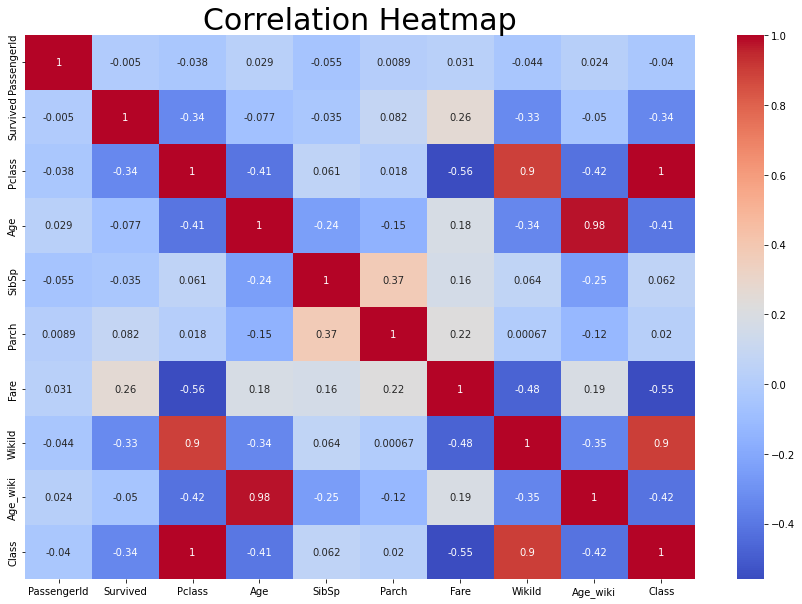

In [ ]:
# Correlation analysis
correlation_matrix = titanic_data.corr()

# Create a heatmap
plt.figure(figsize=(15, 10))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Heatmap',fontsize=30)
plt.show()


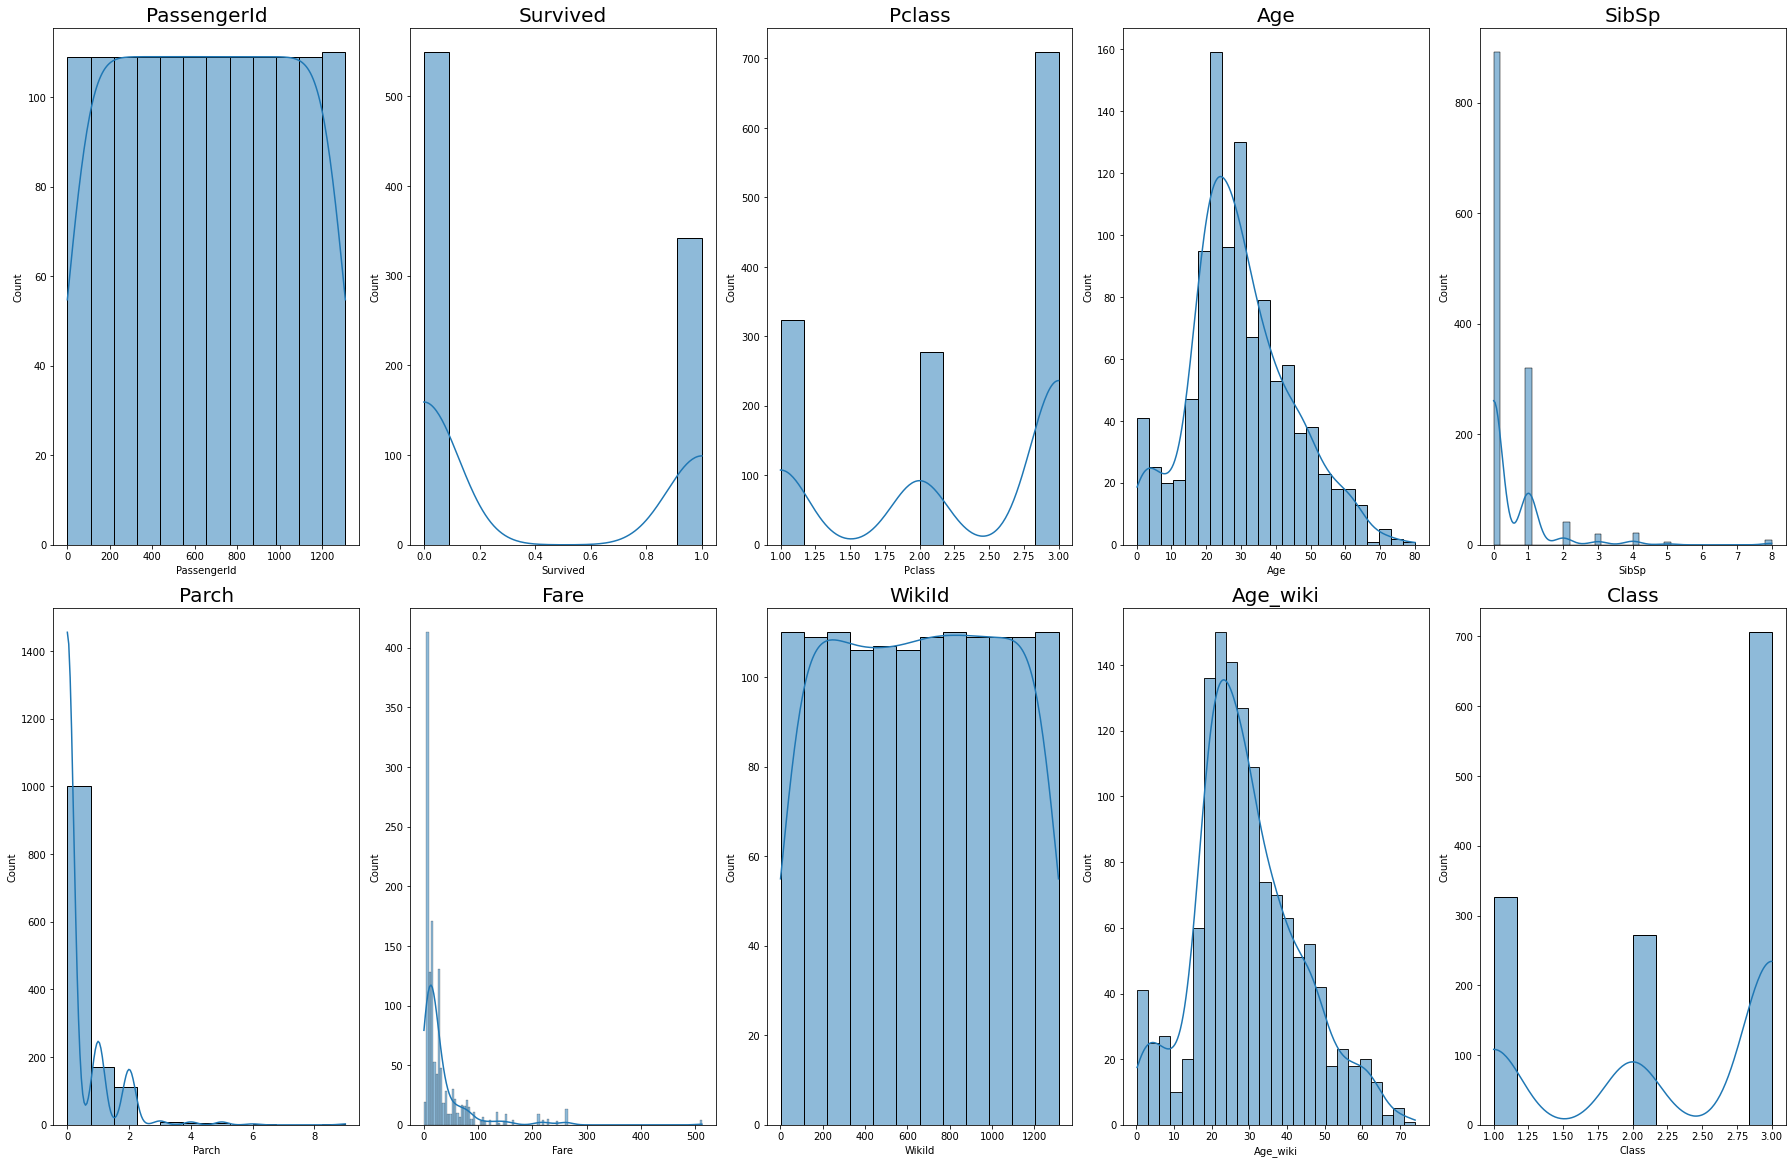

In [ ]:
# Normality check using histograms

numerical_columns = titanic_data.select_dtypes(include=['int64', 'float64']).columns

num_rows = (len(numerical_columns) + 1) // 2  # Calculate the number of subplot rows
plt.figure(figsize=(25, 8 * num_rows))

for i, column in enumerate(numerical_columns, start=1):
    plt.subplot(num_rows, 5, i)
    sb.histplot(titanic_data[column], kde=True)
    plt.title(column,fontsize=20)

plt.tight_layout()
plt.show()


## Insights
- 1.Passenger ID: 

-------------------------------------------------------------------------------------------------------------------

# QUESTION NO - 4

Using “bank.csv”
- e. Display the quantity of empty values
- f. Delete a particular column which has the highest number of empty values
- g. Replace the other missing values using inferentialstatistics
- h. Check if the data is redundant (ifso remove it)

In [16]:
path = "C:\\Users\\uppada satwik\\Downloads\\The world of Data Science\\EDA\\bank_data.csv"
df=pd.read_csv(path,low_memory=False)
pd.set_option('display.expand_frame_repr',False)
df

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45208,45207,51,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45209,45208,71,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45210,45209,72,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45211,45210,57,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


- we need to drop first 2 rows and make index 1 as column header

In [14]:
column_header = df.iloc[1]
df=df.drop([0,1])
df.columns=column_header
df= df.rename(columns={df.columns[0]:"Index No"})
df = df.reset_index(drop=True)
df


1,Index No,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45207,45208,71,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45208,45209,72,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45209,45210,57,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


In [15]:
empty_values = df.isnull().sum()
print(empty_values.reset_index())

           1   0
0   Index No   0
1        age  20
2     salary   0
3    balance   0
4    marital   0
5     jobedu   0
6   targeted   0
7    default   0
8    housing   0
9       loan   0
10   contact   0
11       day   0
12     month  50
13  duration   0
14  campaign   0
15     pdays   0
16  previous   0
17  poutcome   0
18  response  30


In [ ]:
df.isna().mean()*100

1
Index No    0.000000
age         0.044237
salary      0.000000
balance     0.000000
marital     0.000000
jobedu      0.000000
targeted    0.000000
default     0.000000
housing     0.000000
loan        0.000000
contact     0.000000
day         0.000000
month       0.110593
duration    0.000000
campaign    0.000000
pdays       0.000000
previous    0.000000
poutcome    0.000000
response    0.066356
dtype: float64

- Here month column has highest number of null values,so lets remove it

In [ ]:
df= df.drop("month",axis=1)
df.columns

Index(['Index No', 'age', 'salary', 'balance', 'marital', 'jobedu', 'targeted',
       'default', 'housing', 'loan', 'contact', 'day', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'response'],
      dtype='object', name=1)

In [ ]:
df['age'].unique()

array(['58', '44', '33', '47', '35', '28', '42', '43', '41', '29', '53',
       '57', '51', '45', '60', '56', '32', '25', '40', '39', '52', '46',
       '36', '49', '59', '37', '50', '54', '55', '48', '24', '38', '31',
       '30', '27', '34', '23', '26', nan, '61', '22', '21', '20', '66',
       '62', '83', '75', '67', '70', '65', '68', '64', '69', '72', '71',
       '19', '76', '85', '63', '90', '82', '73', '74', '78', '80', '94',
       '79', '77', '86', '95', '81', '18', '89', '84', '87', '92', '93',
       '88'], dtype=object)

- age column is in object data type.so , we need to convert it as numeric 

In [ ]:
df['age'].value_counts(normalize=True)*100

32    4.613751
31    4.412383
33    4.363701
34    4.268549
35    4.186674
        ...   
93    0.004426
90    0.004426
95    0.004426
88    0.004426
94    0.002213
Name: age, Length: 77, dtype: float64

- Now fill null values with mean of age 

In [ ]:
df['age']=np.where(df['age'].isna(),'32',df['age'])

In [ ]:
df['age'].isna().mean()*100

0.0

In [ ]:
df['response'].unique()

array(['no', 'yes', nan], dtype=object)

In [ ]:
df['response'].value_counts(normalize=True)*100

no     88.298178
yes    11.701822
Name: response, dtype: float64

In [ ]:
df['response'].isna().mean()*100

0.0663555329455221

In [ ]:
df['response'] = np.where(df['response'].isna(),'no',df['response'])

In [ ]:
df['response'].value_counts(normalize=True)*100

no     88.305943
yes    11.694057
Name: response, dtype: float64

In [ ]:
df['response'].isna().mean()*100

0.0

In [ ]:
df.isna().mean()

1
Index No    0.0
age         0.0
salary      0.0
balance     0.0
marital     0.0
jobedu      0.0
targeted    0.0
default     0.0
housing     0.0
loan        0.0
contact     0.0
day         0.0
duration    0.0
campaign    0.0
pdays       0.0
previous    0.0
poutcome    0.0
response    0.0
dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Index No  45211 non-null  object
 1   age       45211 non-null  object
 2   salary    45211 non-null  object
 3   balance   45211 non-null  object
 4   marital   45211 non-null  object
 5   jobedu    45211 non-null  object
 6   targeted  45211 non-null  object
 7   default   45211 non-null  object
 8   housing   45211 non-null  object
 9   loan      45211 non-null  object
 10  contact   45211 non-null  object
 11  day       45211 non-null  object
 12  duration  45211 non-null  object
 13  campaign  45211 non-null  object
 14  pdays     45211 non-null  object
 15  previous  45211 non-null  object
 16  poutcome  45211 non-null  object
 17  response  45211 non-null  object
dtypes: object(18)
memory usage: 6.2+ MB


In [ ]:
duplicated_values = df[df.duplicated()]
print(duplicated_values)

Empty DataFrame
Columns: [Index No, age, salary, balance, marital, jobedu, targeted, default, housing, loan, contact, day, duration, campaign, pdays, previous, poutcome, response]
Index: []


--------------------------------------------------------------------------------------------------------------------

# QUESTION NO-5

Using “Boston.csv”
- c. Display a boxplot for DIS attribute and the position of outliers
- d. Select any two attributes of your choice and detect the outliers
- e. Use Z-Score method to detect the outlier when threshold is greater than 3

In [ ]:
path = "Boston.csv"
boston_data = pd.read_csv(path)
boston_data


,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


c. Display a boxplot for DIS attribute and the position of outliers


In [ ]:
boston_data['dis'].value_counts().reset_index()

,index,dis
0,3.4952,5
1,5.7209,4
2,5.2873,4
3,6.8147,4
4,5.4007,4
...,...,...
407,2.4220,1
408,2.1620,1
409,2.0407,1
410,1.9709,1


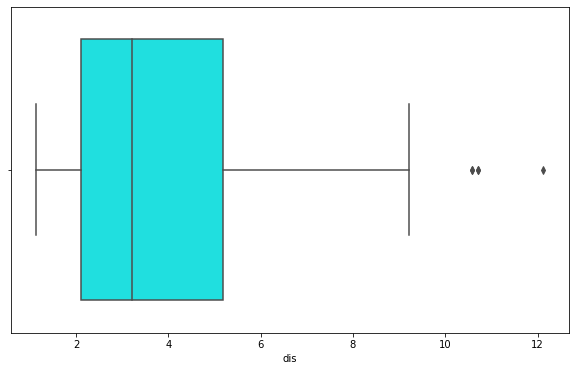

In [ ]:
plt.figure(figsize=(10,6))
sb.boxplot(data=boston_data,x='dis',color='cyan')
plt.show()

- Here, we can see outliers are present on the rightside of boxplot means they are on upper whisker side

### Select any two attributes of your choice and detect the outliers

Let's choose crim and indus attributes for this example

In [ ]:
attributes = ['crim','indus']

for attr in attributes:
    attribute_values = boston_data[attr]
    Q1 = np.percentile(attribute_values, 25)
    Q3 = np.percentile(attribute_values, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = attribute_values[(attribute_values < lower_bound) | (attribute_values > upper_bound)]
    print(f"Outliers in {attr}: {outliers}")



Outliers in crim: 367    13.5222
371     9.2323
373    11.1081
374    18.4982
375    19.6091
        ...   
468    15.5757
469    13.0751
477    15.0234
478    10.2330
479    14.3337
Name: crim, Length: 66, dtype: float64
Outliers in indus: Series([], Name: indus, dtype: float64)


In [ ]:
z_scores = (boston_data - boston_data.mean())/boston_data.std()
threshold = 3

outliers = np.abs(z_scores) >threshold 

outliers_indices = np.where(outliers)

# Print the indices of outliers
print("Indices of outliers using Z-Score method with threshold > 3:")
print(outliers_indices[0])

Indices of outliers using Z-Score method with threshold > 3:
[ 55  56  57 102 141 142 152 154 155 160 162 163 199 200 201 202 203 204
 208 209 210 211 212 216 218 219 220 221 222 225 234 236 256 257 262 269
 273 274 276 277 282 283 283 284 347 351 352 353 353 354 355 356 357 358
 363 364 364 365 367 369 370 372 373 374 374 380 398 404 405 406 410 410
 411 412 412 414 414 415 416 418 418 419 423 424 425 426 427 427 429 431
 436 437 438 445 450 454 455 456 457 466]


---------------------------------------------------------------------------------------

# QUESTION NO-6

Take any dataset of your choice which contains outliers
- e. Detect outliers using IQR method
- f. Display the position of those outliers
- g. Eliminate those outliers from the dataset
- h. Verify if the outliers got eliminated using visualization

In [ ]:
os.chdir("C:\\Users\\uppada satwik\\Downloads\\csv\\")

In [ ]:
file ="adult.csv"
data=pd.read_csv(file)
data.columns


Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'Income', 'Unnamed: 16'],
      dtype='object')

In [ ]:
data['age'].value_counts().reset_index()

,index,age
0,36,1348
1,35,1337
2,33,1335
3,23,1329
4,31,1325
...,...,...
69,88,6
70,85,5
71,87,3
72,89,2


In [ ]:
data['age'].unique()

array([30, 25, 38, 28, 44, 18, 34, 29, 63, 24, 55, 65, 36, 26, 58, 48, 43,
       20, 37, 40, 72, 45, 22, 23, 54, 32, 46, 56, 17, 39, 52, 21, 42, 33,
       47, 41, 19, 69, 50, 31, 59, 49, 51, 27, 57, 61, 64, 79, 73, 53, 77,
       80, 62, 35, 68, 66, 75, 60, 67, 71, 70, 90, 81, 74, 78, 82, 83, 85,
       76, 84, 89, 88, 87, 86], dtype=int64)

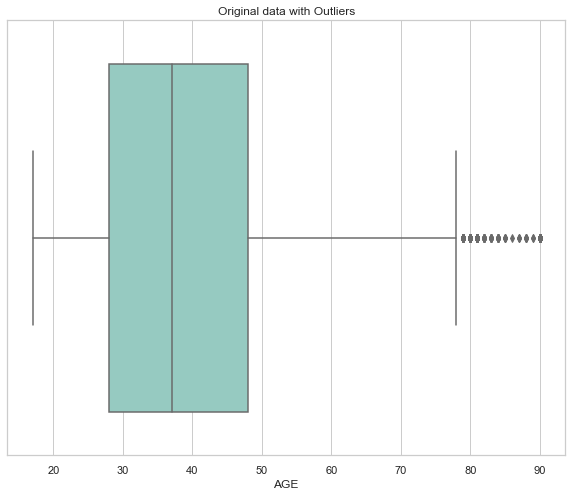

In [ ]:
sb.set(style="whitegrid")
plt.figure(figsize=(10,8))
plt.rc("font",size=30)
sb.boxplot(data=data,x='age',palette="Set3")
plt.title("Original data with Outliers")
plt.xlabel("AGE")

plt.show()


- we can see that outliers in right side (upper whisker)

In [ ]:
data['age'].describe()

count    48844.000000
mean        38.643129
std         13.710424
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

### Detecting outliers using IQR method

- Formula for finding IQR is Third Quartile - First Quartile

In [ ]:
iqr = data['age'].quantile(0.75) - data['age'].quantile(0.25)
iqr

20.0

Next, we need to find the Upper Whisker and Lower Whisker
- Upper whisker = Third Quartile + 1.5 * IQR
- Lower whisker = First quartile - 1.5 * IQR

In [ ]:
uw = data['age'].quantile(0.75) + 1.5 * iqr
lw = data['age'].quantile(0.25) - 1.5 * iqr
print("Upper Whisker: ",uw)
print("Lower whisker: ",lw)

Upper Whisker:  78.0
Lower whisker:  -2.0


### Display the position of those outliers

In [ ]:
age_data = data['age']
print(age_data[(age_data<lw)  | (age_data>uw)].reset_index())


     index  age
0      195   79
1      236   80
2      901   90
3      928   79
4      953   80
..     ...  ...
211  48560   90
212  48650   90
213  48742   85
214  48777   82
215  48808   81

[216 rows x 2 columns]


- These are the positionn of outliers in the data

### Eliminate those outliers from the dataset


In [ ]:
data['new_age'] =np.where(data['age']>uw,uw,data['age'])

### Verify if the outliers got eliminated using visualization

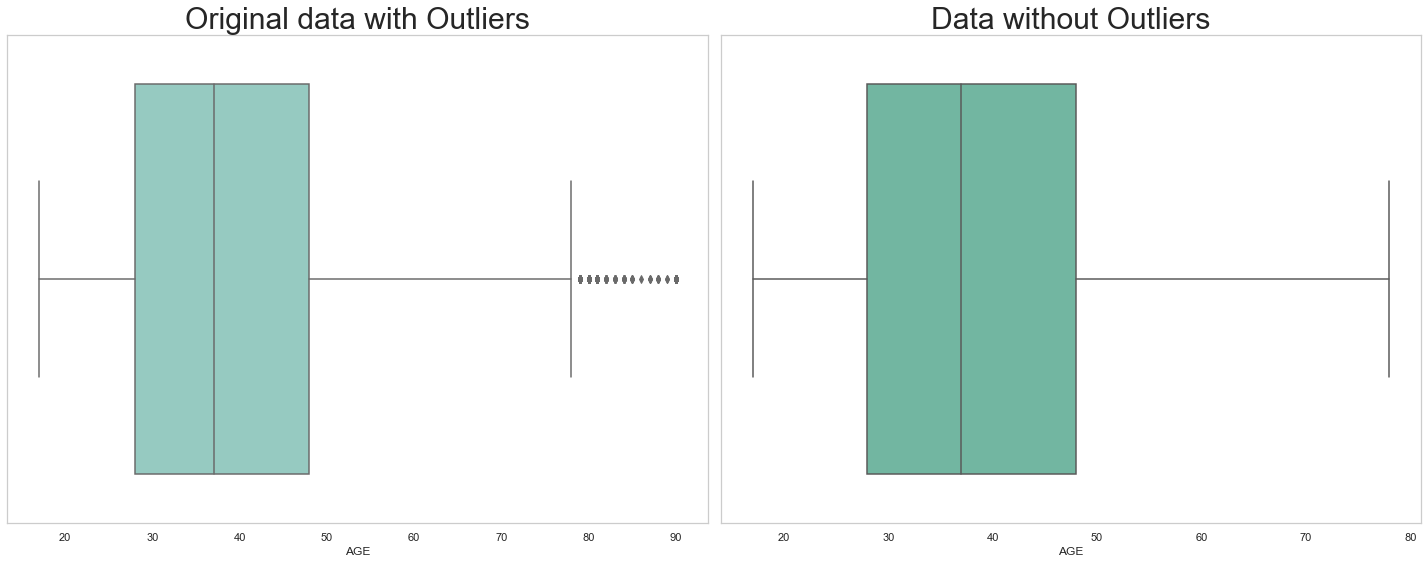

In [ ]:
sb.set(style="whitegrid")
plt.figure(figsize=(20,8))
plt.rc("font",size=12)

plt.subplot(1,2,1)
sb.boxplot(data=data,x='age',palette="Set3")
plt.title("Original data with Outliers",fontsize= 30)
plt.xlabel("AGE")
plt.gca().xaxis.grid(False)

plt.subplot(1,2,2)
sb.boxplot(data=data,x='new_age',palette="Set2")
plt.title("Data without Outliers",fontsize = 30)
plt.xlabel("AGE")
plt.gca().xaxis.grid(False)

plt.tight_layout()

plt.show()


### Outliers are removed here we can see boxplot without outliers and differance between them